# GCC118 - Programação Matemática
## Prof. Mayron César de O. Moreira
### Programação Linear: Modelagem Matemática

- *Universidade Federal de Lavras*  
- *Departamento de Ciência da Computação*  

## Problema de transporte, transbordo e designação

Uma empresa distribuidora de bebidas tem dois centros de produção, Araraquara (AQ) e São José dos Campos (SJC), dois depósitos, Campinas (CP) e Barra Mansa (BM), e três mercados consumidores, São Paulo (SP), Belo Horizonte (BH) e Rio de Janeiro (RJ). Os centros de produção devem enviar os produtos aos depósitos e estes, na sequência, transportá-los aos mercados consimidores. Os depósitos não possuem capacidade de estocagem.

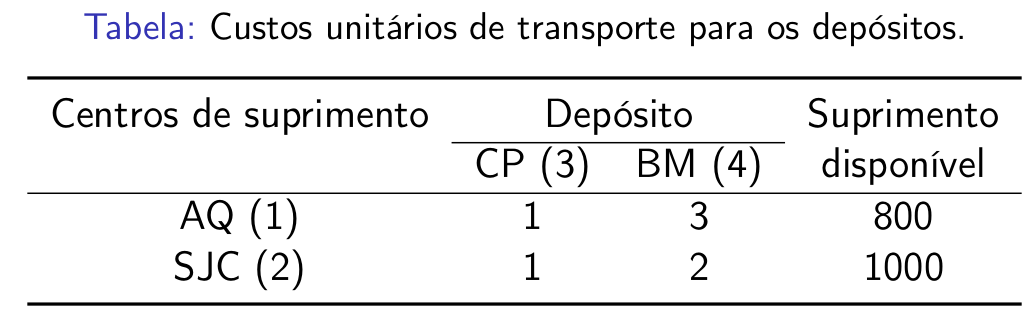

In [1]:
from IPython.display import Image
Image(filename='./images/Tabela1_Transbordo.png', width=500, height=500)

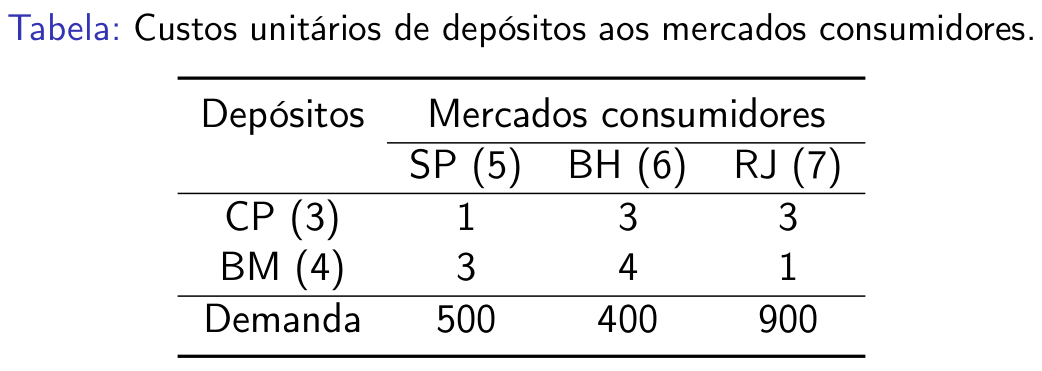

In [2]:
from IPython.display import Image
Image(filename='./images/Tabela2_Transbordo.png', width=500, height=500)

**Objetivo:** Determinar as quantidades de itens a serem transportados que minimize os custos, levando em conta restrições de demanda e oferta.

### Parâmetros

- $S=\{1,2\}$: centros de suprimento;
- $D=\{3,4\}$: depósitos;
- $C=\{5,6,7\}$: mercados consumidores;
- $o_i$: oferta de $i \in S$;
- $d_j$: demanda de $j \in C$;
- $A$: conjunto de possibilidades de transporte entre as cidades $i,j$;
- $c_{ij}$: custo de transporte de $i$ para $j$, $(i,j) \in A$.

In [3]:
from gurobipy import * # Biblioteca que resolverá o modelo formulado
import itertools # Biblioteca utilizada para o produto cartesiano de dois conjuntos

# Centros de suprimento
S = ['1','2']

# Depósitos
D = ['3','4']

# Mercados consumidores
C = ['5','6','7']

# Demandas
d = {
    '5': 500,
    '6': 400,
    '7': 900
}

# Ofertas
o = {
    '1': 800,
    '2': 1000
}

# Custos de transporte
c = {
    ('1','3'): 1,
    ('1','4'): 3,
    ('2','3'): 1,
    ('2','4'): 2,
    ('3','5'): 1,
    ('3','6'): 3,
    ('3','7'): 3,
    ('4','5'): 3,
    ('4','6'): 4,
    ('4','7'): 1
}

A = set(itertools.product(S,D)).union(itertools.product(D,C))
print(A)

{('2', '4'), ('4', '6'), ('1', '4'), ('4', '5'), ('2', '3'), ('3', '7'), ('3', '6'), ('1', '3'), ('3', '5'), ('4', '7')}


### Cria o modelo

In [4]:
# Cria o Modelo
m = Model("Problema do transporte, transbordo e designação")

Academic license - for non-commercial use only


### Variáveis

- $x_{ij} \ge 0$: quantidade de bebidas transportadas de $i$ para $j$.

In [5]:
# x_{ij} >= 0, continua (real)
x = m.addVars(A, vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x")

### Função objetivo

*Minimiza o custo total de transporte*
\begin{equation}
\mbox{min } f(x) = \sum_{(i,j) \in A} c_{ij}x_{ij}
\end{equation}

In [6]:
m.setObjective(sum(c[i,j]*x[i,j] for i,j in A), GRB.MINIMIZE)

### Restrições

- *Quantidade transportada na origem deve respeitar a oferta*
\begin{equation}
\sum_{j \in D} x_{ij} \le o_i, \forall i \in S
\end{equation}

- *Quantidade transportada ao destino deve atender a demanda*
\begin{equation}
\sum_{i \in D} x_{ij} = d_j, \forall j \in C
\end{equation}

- * Balanço da quantidade que entra e que sai dos depósitos
\begin{equation}
\sum_{i \in S} x_{ij} = \sum_{k \in C} x_{jk}, \forall j \in D
\end{equation}

In [7]:
# Quantidade transportada na origem deve respeitar a oferta
m.addConstrs((quicksum(x[i,j] for j in D) <= o[i] for i in S), "Restricao_Oferta")
    
# Quantidade transportada ao destino deve atender a demanda
m.addConstrs((quicksum(x[i,j] for i in D) == d[j] for j in C), "Restricao_Demanda")
    
# Balanço da quantidade que entra e que sai dos depósitos
m.addConstrs((quicksum(x[i,j] for i in S) == quicksum(x[j,k] for k in C) for j in D), "Restricao_Balanco")

{'3': <gurobi.Constr *Awaiting Model Update*>,
 '4': <gurobi.Constr *Awaiting Model Update*>}

### Resolve o modelo e imprime solução

In [8]:
m.optimize()

if m.status == GRB.Status.OPTIMAL:
    m.printAttr('X')
    
else:
    print("Modelo finalizado com status %d" % m.status)
    
m.write("teste.lp")

Optimize a model with 7 rows, 10 columns and 20 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+03]
Presolve removed 3 rows and 3 columns
Presolve time: 0.01s
Presolved: 4 rows, 7 columns, 14 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6000000e+03   2.250000e+02   0.000000e+00      0s
       4    5.3000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.02 seconds
Optimal objective  5.300000000e+03

    Variable            X 
-------------------------
      x[2,4]          900 
      x[2,3]          100 
      x[3,6]          400 
      x[1,3]          800 
      x[3,5]          500 
      x[4,7]          900 
